# Main file for thesis project

Ie the top level script which runs the whole `pic -> recognise -> aim gimbal -> repeat` show

In [1]:
#!/usr/bin/python3
# top level script to run the show
import time
# import PIL.Image
import numpy as np

# import gimbal_control as gc

# import matplotlib.pyplot as plt

## A Basic Loop

In [2]:
from extended_kalman_filter import ExtendedKalmanFilter

EKF = ExtendedKalmanFilter(Ts=0.01, Q=np.deg2rad(5)**2, R=np.deg2rad(10)**2)  # need to tweak Q and R

In [3]:
from image_classifier import ImageClassifier

IC = ImageClassifier(
    graph_filename='../Models/MobileNet_SSD_caffe/graph',
    label_filename='../Models/MobileNet_SSD_caffe/categories.txt',
    class_of_interest='person',
    camera_resolution=(1640,922),
    debug=False)

/usr/lib/python3/dist-packages/picamera/encoders.py:521: PiCameraAlphaStripping: using alpha-stripping to convert to non-alpha format; you may find the equivalent alpha format faster
  "using alpha-stripping to convert to non-alpha "
/usr/lib/python3/dist-packages/picamera/encoders.py:544: PiCameraResolutionRounded: frame size rounded up from 300x300 to 320x304
  width, height, fwidth, fheight)))
/usr/local/lib/python3.5/dist-packages/mvnc/mvncapi.py:418: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  tensor = numpy.fromstring(tensor.raw, dtype=numpy.float32)


In [4]:
phi_yaw_arr = []
EKF_yaw_arr = []
time_arr    = []
t_start = time.time()
phi_yaw = 0
total_run_time = 20 # seconds

while True:
    print('+', end='')
    t = time.time()
    
    EKF.predict()
    
    # if there is a new result waiting...
    if not IC.dict_queue.empty():
        print('.',end='')
        bb, bb_angles = IC.get_result()

        # and there was an actual object detected...
        if bb_angles != -1:
            (phi_x1, phi_y1), (phi_x2, phi_y2) = bb_angles
            phi_yaw = (phi_x1 + phi_x2)/2
            phi_pitch = (phi_y1 + phi_y2)/2

            EKF.update(phi_yaw)
    
    phi_yaw_arr.append(phi_yaw)
    EKF_yaw_arr.append(EKF.x.item(0))
    time_arr.append(time.time() - t_start)
    
    if time.time() > t_start + total_run_time:
        break
    
    if time.time() - t < 0.005:
        continue
    else:
        time.sleep(0.2 - (time.time() - t))

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++.+.+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++.+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++.++.++++++++++++++++++++.+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++.+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [5]:
import matplotlib.pyplot as plt

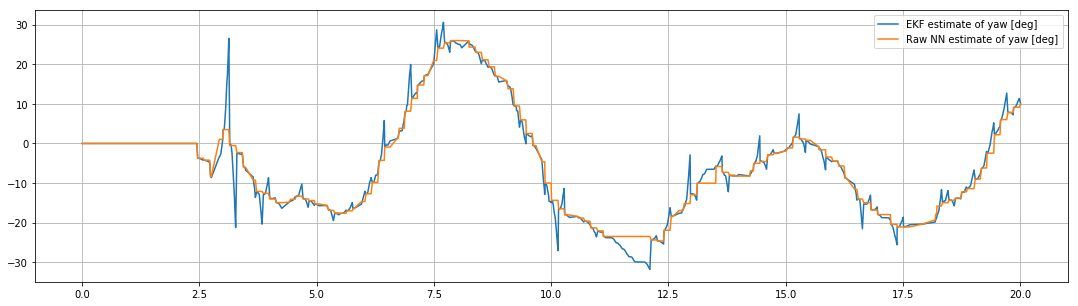

In [6]:
plt.plot(time_arr, EKF_yaw_arr, label='EKF estimate of yaw [deg]')
plt.plot(time_arr, phi_yaw_arr, label='Raw NN estimate of yaw [deg]')
plt.legend(); plt.grid(); fig = plt.gcf(); fig.set_size_inches(18.5, 5, forward=True); plt.show()

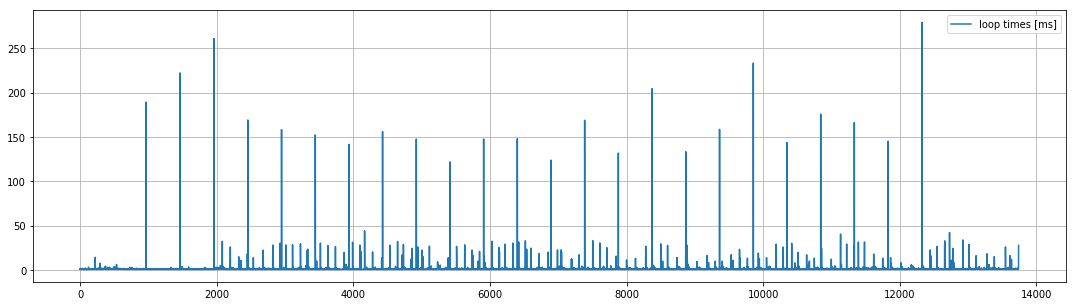

In [10]:
loop_times_ms = [(t-t_)*1e3 for t_,t in zip(time_arr[0:-1], time_arr[1:])]
plt.plot(loop_times_ms, label='loop times [ms]')
plt.legend(); plt.grid(); fig = plt.gcf(); fig.set_size_inches(18.5, 5, forward=True); plt.show()

In [ ]:
# def plot_util(_plt):
#     _plt.legend()
#     _plt.grid()
#     fig = _plt.gcf();
#     fig.set_size_inches(18.5, 5, forward=True)
#     _plt.show()